In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import re
import shutil
import time
from datetime import datetime
from datetime import timedelta
pd.set_option('display.max_columns',None)
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

In [14]:
'''loading data'''
path=os.getcwd()
df=pd.read_excel(path+'\\datasource.xlsx',sheet_name='折线图',parse_dates=True)
print(df.info())
display('df','df.describe()')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
时间           6 non-null object
销售（营业）利润率    6 non-null float64
应收账款周转次数     6 non-null float64
应收账款周转次数一    6 non-null float64
dtypes: float64(3), object(1)
memory usage: 272.0+ bytes
None


df
   时间  销售（营业）利润率  应收账款周转次数  应收账款周转次数一
0  年1     0.0200      3.00       2.00
1  年2     0.0100      5.00       4.00
2  年3     0.0150      6.00       5.00
3  年4     0.0050      2.00       1.00
4  年5     0.0080      1.20       0.20
5  年6     0.0075      1.55       0.55

df.describe()
       销售（营业）利润率  应收账款周转次数  应收账款周转次数一
count   6.000000  6.000000   6.000000
mean    0.010917  3.125000   2.125000
std     0.005572  1.962078   1.962078
min     0.005000  1.200000   0.200000
25%     0.007625  1.662500   0.662500
50%     0.009000  2.500000   1.500000
75%     0.013750  4.500000   3.500000
max     0.020000  6.000000   5.000000

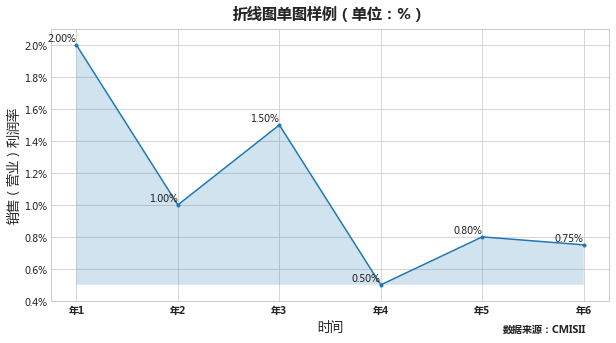

In [15]:
'''plot line picts'''
# 绘制基本图形
plt.figure(figsize=(10,5))
plt.plot(df.index,df['销售（营业）利润率'],'.-')
plt.fill_between(df.index,df['销售（营业）利润率'].min(),df['销售（营业）利润率'],alpha=0.2)
plt.title('折线图单图样例（单位：%）',fontsize=15,fontweight='bold',pad=10)
plt.ylim(0.004,0.021)
plt.xlabel('时间',fontsize=13)
plt.ylabel('销售（营业）利润率',fontsize=13)
# 添加上标
for a,b in zip(df.index,df['销售（营业）利润率']):
        plt.text(a,b, '{}%'.format( '%.2f'%(b*100)),ha='right',va='bottom',fontsize=10)
# 纵坐标百分号显示
def to_percent(temp,position):
    return '%.1f'%(100*temp)+'%' #保留一位小数
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# 替换横坐标名称
# plt.gca().set_xticklabels(df.loc[:,'时间'],fontsize=10,fontweight='bold')
plt.xticks(df.index,df['时间'],fontsize=10,fontweight='bold')
#添加脚注以及保存图片    
plt.text(4.2, 0.002, '数据来源：CMISII',fontsize=10,fontweight='bold')
#保存图片 
plt.savefig('折线图单图样例.png',bbox_inches='tight')

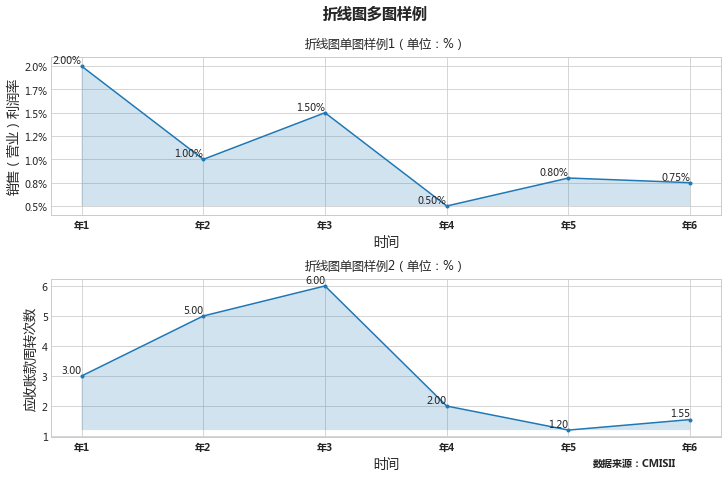

In [17]:
'''plot subplots picts'''
#对整体图像设定画布
fig=plt.figure(figsize=(12,7))

#绘制图形1
plt.subplot(2,1,1) 
plt.plot(df.index,df['销售（营业）利润率'],'.-')
plt.fill_between(df.index,df['销售（营业）利润率'].min(),df['销售（营业）利润率'],alpha=0.2)
plt.title('折线图单图样例1（单位：%）',pad=10)
plt.ylim(0.004,0.021)
plt.xlabel('时间',fontsize=13)
plt.ylabel('销售（营业）利润率',fontsize=13)
# 添加上标
for a,b in zip(df.index,df['销售（营业）利润率']):
        plt.text(a,b, '{}%'.format( '%.2f'%(b*100)),ha='right',va='bottom',fontsize=10)
# 纵坐标百分号显示
def to_percent(temp,position):
    return '%.1f'%(100*temp)+'%' #保留一位小数
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# 替换横坐标名称
# plt.gca().set_xticklabels(df.loc[:,'时间'],fontsize=10,fontweight='bold')
plt.xticks(df.index,df['时间'],fontsize=10,fontweight='bold')

#绘制图形2
plt.subplot(2,1,2) 
plt.plot(df.index,df['应收账款周转次数'],'.-')
plt.fill_between(df.index,df['应收账款周转次数'].min(),df['应收账款周转次数'],alpha=0.2)
plt.title('折线图单图样例2（单位：%）',pad=10)
plt.xlabel('时间',fontsize=13)
plt.ylabel('应收账款周转次数',fontsize=13)
# 添加上标
for a,b in zip(df.index,df['应收账款周转次数']):
        plt.text(a,b, '{}'.format( '%.2f'%(b)),ha='right',va='bottom',fontsize=10)
# 替换横坐标名称
# plt.gca().set_xticklabels(df.loc[:,'时间'],fontsize=10,fontweight='bold')
plt.xticks(df.index,df['时间'],fontsize=10,fontweight='bold')

#对整体图像设置标题
plt.suptitle('折线图多图样例',fontsize=15,fontweight='bold') 
#对整体图像设定图形间间隔   
fig.subplots_adjust(hspace=0.4) 
#对整体图像添加脚注   
plt.text(4.2, 0.002, '数据来源：CMISII',fontsize=10,fontweight='bold')
#保存图片 
plt.savefig('折线图多图样例.png',bbox_inches='tight')

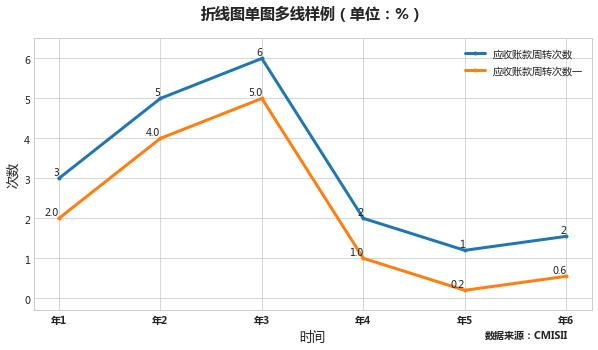

In [21]:
'''plot multi_lines picts'''
# 绘制基本图形
plt.figure(figsize=(10,5))
for col in df.columns[2:]:
    plt.plot(df.index,df[col],'.-',linewidth=3,label=col)
plt.title('折线图单图多线样例（单位：%）',fontsize=15,fontweight='bold',pad=20)
plt.xlabel('时间',fontsize=13)
plt.ylabel('次数',fontsize=13)
plt.ylim(df['应收账款周转次数一'].min()-0.5,df['应收账款周转次数'].max()+0.5)
# 添加上标
for a,b in zip(df.index,df['应收账款周转次数']):
        plt.text(a,b, '{}'.format( '%.0f'%(b)),ha='right',va='bottom',fontsize=10)
for a,b in zip(df.index,df['应收账款周转次数一']):
        plt.text(a,b, '{}'.format( '%.1f'%(b)),ha='right',va='bottom',fontsize=10)
#设置图例
plt.legend(fontsize=10,bbox_to_anchor=(1, 1))
# 替换横坐标名称
plt.xticks(df.index,df['时间'],fontsize=10,fontweight='bold')
#添加脚注   
plt.text(4.2, -1, '数据来源：CMISII',fontsize=10,fontweight='bold')
#保存图片 
plt.savefig('折线图单图多线样例.png',bbox_inches='tight')

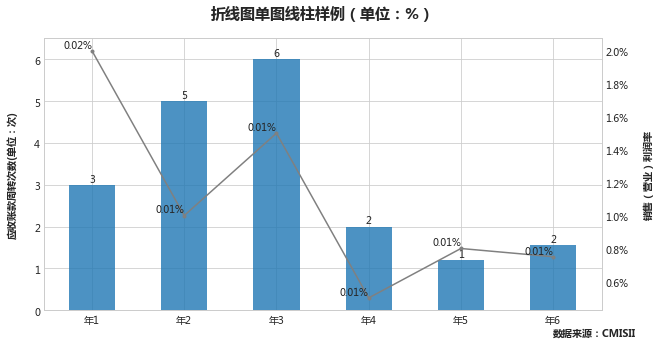

In [47]:
'''plot bar_lines picts'''
fig,ax1=plt.subplots(figsize=(10,5))
plt.title('折线图单图线柱样例（单位：%）',fontsize=15,fontweight='bold',pad=20)

# 设置bar chart
ax1.bar(df.index,df['应收账款周转次数'],align='center',alpha=0.8,width=0.5)
ax1.set_ylim(0,df['应收账款周转次数'].max()+0.5)
ax1.set_ylabel('应收账款周转次数(单位：次)',fontweight='bold',labelpad=15)
# 添加ax1上标
for a,b in zip(df.index,df['应收账款周转次数']):
    ax1.text(a,b,  '{}'.format( '%.0f'%(b)),ha='center',va='bottom',fontsize=10)

# 设置line chart
ax2=ax1.twinx()
ax2.plot(df.index,df['销售（营业）利润率'],'.-',color='gray')
ax2.set_ylabel('销售（营业）利润率',fontweight='bold',labelpad=15)
# ax2纵坐标百分号显示
def to_percent(temp,position):
    return '%.1f'%(100*temp)+'%' #保留一位小数
ax2.yaxis.set_major_formatter(FuncFormatter(to_percent))
# 添加ax2上标
for a,b in zip(df.index,df['销售（营业）利润率']):
    ax2.text(a,b, '{}%'.format( '%.2f'%(b)),ha='right',va='bottom',fontsize=10)
#去掉ax2网格
ax2.grid()

# 替换横坐标名称
plt.xticks(df.index,df['时间'],fontsize=10,fontweight='bold')
#添加脚注   
plt.text(df.index[-1], df['销售（营业）利润率'].min()-0.0023, '数据来源：CMISII',fontsize=10,
         fontweight='bold')
#保存图片 
plt.savefig('折线图单图线柱样例.png',bbox_inches='tight')    